In [2]:
import cv2
import os

video=cv2.VideoCapture(0)

facedetect=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

count=0

nameID=str(input("Enter Your Name: ")).lower()

path='images/'+nameID

isExist = os.path.exists(path)

if isExist:
	print("Name Already Taken")
	nameID=str(input("Enter Your Name Again: "))
else:
	os.makedirs(path)

while True:
	ret,frame=video.read()
	faces=facedetect.detectMultiScale(frame,1.3, 5)
	for x,y,w,h in faces:
		count=count+1
		name='./images/'+nameID+'/'+ str(count) + '.jpg'
		print("Creating Images........." +name)
		cv2.imwrite(name, frame[y:y+h,x:x+w])
		cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,0), 3)
	cv2.imshow("WindowFrame", frame)
	cv2.waitKey(1)
	if count>500:
		break
video.release()
cv2.destroyAllWindows()

Enter Your Name: imed
Creating Images........../images/imed/1.jpg
Creating Images........../images/imed/2.jpg
Creating Images........../images/imed/3.jpg
Creating Images........../images/imed/4.jpg
Creating Images........../images/imed/5.jpg
Creating Images........../images/imed/6.jpg
Creating Images........../images/imed/7.jpg
Creating Images........../images/imed/8.jpg
Creating Images........../images/imed/9.jpg
Creating Images........../images/imed/10.jpg
Creating Images........../images/imed/11.jpg
Creating Images........../images/imed/12.jpg
Creating Images........../images/imed/13.jpg
Creating Images........../images/imed/14.jpg
Creating Images........../images/imed/15.jpg
Creating Images........../images/imed/16.jpg
Creating Images........../images/imed/17.jpg
Creating Images........../images/imed/18.jpg
Creating Images........../images/imed/19.jpg
Creating Images........../images/imed/20.jpg
Creating Images........../images/imed/21.jpg
Creating Images........../images/imed/22.j

Creating Images........../images/imed/184.jpg
Creating Images........../images/imed/185.jpg
Creating Images........../images/imed/186.jpg
Creating Images........../images/imed/187.jpg
Creating Images........../images/imed/188.jpg
Creating Images........../images/imed/189.jpg
Creating Images........../images/imed/190.jpg
Creating Images........../images/imed/191.jpg
Creating Images........../images/imed/192.jpg
Creating Images........../images/imed/193.jpg
Creating Images........../images/imed/194.jpg
Creating Images........../images/imed/195.jpg
Creating Images........../images/imed/196.jpg
Creating Images........../images/imed/197.jpg
Creating Images........../images/imed/198.jpg
Creating Images........../images/imed/199.jpg
Creating Images........../images/imed/200.jpg
Creating Images........../images/imed/201.jpg
Creating Images........../images/imed/202.jpg
Creating Images........../images/imed/203.jpg
Creating Images........../images/imed/204.jpg
Creating Images........../images/i

Creating Images........../images/imed/364.jpg
Creating Images........../images/imed/365.jpg
Creating Images........../images/imed/366.jpg
Creating Images........../images/imed/367.jpg
Creating Images........../images/imed/368.jpg
Creating Images........../images/imed/369.jpg
Creating Images........../images/imed/370.jpg
Creating Images........../images/imed/371.jpg
Creating Images........../images/imed/372.jpg
Creating Images........../images/imed/373.jpg
Creating Images........../images/imed/374.jpg
Creating Images........../images/imed/375.jpg
Creating Images........../images/imed/376.jpg
Creating Images........../images/imed/377.jpg
Creating Images........../images/imed/378.jpg
Creating Images........../images/imed/379.jpg
Creating Images........../images/imed/380.jpg
Creating Images........../images/imed/381.jpg
Creating Images........../images/imed/382.jpg
Creating Images........../images/imed/383.jpg
Creating Images........../images/imed/384.jpg
Creating Images........../images/i

In [8]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

In [9]:
train_path="images/train"
valid_path="images/valid"

In [10]:
x_train=[]

for folder in os.listdir(train_path):

    sub_path=train_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))
        x_train.append(img_arr)
        
x_valid=[]

for folder in os.listdir(valid_path):

    sub_path=valid_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))
        x_valid.append(img_arr)        

In [11]:
train_x=np.array(x_train)
valid_x=np.array(x_valid)

In [12]:
train_x=train_x/255.0
valid_x=valid_x/255.0

In [13]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
                                   zoom_range=0.1,  # Randomly zoom image
                                   width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
                                   height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
                                   horizontal_flip=True,  # randomly flip images horizontally
                                   vertical_flip=False,)
valid_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
                                   zoom_range=0.1,  # Randomly zoom image
                                   width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
                                   height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
                                   horizontal_flip=True,  # randomly flip images horizontally
                                   vertical_flip=False,)

In [14]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'sparse')
validation_set = valid_datagen.flow_from_directory(valid_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'sparse')

Found 788 images belonging to 2 classes.
Found 196 images belonging to 2 classes.


In [15]:
train_y=training_set.classes
valid_y=validation_set.classes

In [16]:
training_set.class_indices
validation_set.class_indices

{'imed': 0, 'messi': 1}

In [17]:
train_y.shape

(788,)

In [18]:
vgg = VGG19(input_shape=(224,224,3), weights='imagenet', include_top=False)

In [19]:
for layer in vgg.layers:
    layer.trainable = False

In [20]:
x = Flatten()(vgg.output)
prediction = Dense(2, activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)

In [21]:
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [22]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)

In [23]:
history = model.fit(
  train_x,
  train_y,
  validation_data=(valid_x,valid_y),  
  epochs=20,
  callbacks=[early_stop],
  batch_size=32,shuffle=True)

25/25 [==============================] - 177s 7s/step - loss: 0.1546 - accuracy: 0.9086 - val_loss: 0.0770 - val_accuracy: 0.9388


In [24]:
import matplotlib.image as mpimg

def show_image(image_path):
    image = mpimg.imread(image_path)
    print(image.shape)
    plt.imshow(image)

In [25]:
from tensorflow.keras.preprocessing import image as image_utils

def make_predictions(image_path):
    show_image(image_path)
    image = image_utils.load_img(image_path, target_size=(224, 224))
    image = image_utils.img_to_array(image)
    image = image.reshape(1,224,224,3)
    image = preprocess_input(image)
    preds = model.predict(image)
    n = np.argmax(preds)
    if n == 0 :
        print('imed')
    else :
        print('not imed')
    return preds

(108, 108, 3)
1/1 [==============================] - 0s 273ms/step
not imed


array([[2.279934e-22, 1.000000e+00]], dtype=float32)

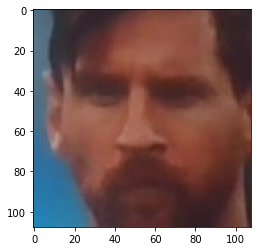

In [27]:
make_predictions('../../Documents/170 (2).jpg')

In [32]:
facedetect = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

cap=cv2.VideoCapture(0)
cap.set(3, 640)
cap.set(4, 480)
font=cv2.FONT_HERSHEY_COMPLEX





def get_className(classNo):
	if classNo==0:
		return "imed"
	elif classNo==1:
		return "messi"

while True:
	sucess, imgOrignal=cap.read()
	faces = facedetect.detectMultiScale(imgOrignal,1.3,5)
	for x,y,w,h in faces:
		crop_img=imgOrignal[y:y+h,x:x+h]
		img=cv2.resize(crop_img, (224,224))
		img=img.reshape(1, 224, 224, 3)
		prediction=model.predict(img)
		classIndex=np.argmax(prediction)
		probabilityValue=np.amax(prediction)
		if classIndex==0:
			cv2.rectangle(imgOrignal,(x,y),(x+w,y+h),(0,255,0),2)
			cv2.rectangle(imgOrignal, (x,y-40),(x+w, y), (0,255,0),-2)
			cv2.putText(imgOrignal, str(get_className(classIndex)),(x,y-10), font, 0.75, (255,255,255),1, cv2.LINE_AA)
		elif classIndex==1:
			cv2.rectangle(imgOrignal,(x,y),(x+w,y+h),(0,255,0),2)
			cv2.rectangle(imgOrignal, (x,y-40),(x+w, y), (0,255,0),-2)
			cv2.putText(imgOrignal, str(get_className(classIndex)),(x,y-10), font, 0.75, (255,255,255),1, cv2.LINE_AA)

		cv2.putText(imgOrignal,str(round(probabilityValue*100, 2))+"%" ,(180, 75), font, 0.75, (255,0,0),2, cv2.LINE_AA)
	cv2.imshow("Result",imgOrignal)
	k=cv2.waitKey(1)
	if k==ord('q'):
		break


cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 260ms/step


1/1 [==============================] - 0s 230ms/step


1/1 [==============================] - 0s 251ms/step


1/1 [==============================] - 0s 244ms/step


1/1 [==============================] - 0s 221ms/step


1/1 [==============================] - 0s 239ms/step
